## Data Collect

In [ ]:
# 참고내용
# CNN
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (부록)\\(Misc.) 1. cvlib을 활용한 편리한 얼굴 & 물체 검출'
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 4. TF2.0 Tensorboard & Keras for CNN MNIST (+ Colab GPU with GoogleDrive)'
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 2. Build, Train, and Visualize CNN models (CNN Basic)'

# DNN
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 3. CNN for Fashion MNIST & CIFAR10 (+Transfer learning)'

### Image Scraping

In [ ]:
# colab install
# !pip install selenium
# !apt-get update
# !apt install chromium-chromedriver

In [1]:
import pandas as pd


# from selenium import webdriver # colab에서는 skip
from bs4 import BeautifulSoup
import requests

import time

import pandas as pd
import os

#### Image URL address scraping

In [ ]:
item_num = "685185"#"685185" - 슬리퍼1, "497858"-슬리퍼2, "1789507"-가방, "903340" -상의
base_url = "https://store.musinsa.com/app/goods/"
url = base_url + item_num

In [ ]:
# colab 에서 처리할때 하단 주석코드 추가
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')


# driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options) #colab
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') #local

driver.get(url)

In [ ]:
img_url_lst = []
img_url_temp_lst = []
img_url_right_lst = [] # 제대로 후기를 올린 사진들
img_url_wrong_lst = [] # 후기를 잘못 올려서 고객센터에서 댓글을 올려진 사진들

In [ ]:
# 페이지값 가져오기
web = driver.page_source
soup = BeautifulSoup(web, 'html.parser')
range_tag = soup.find("div",{"class":"wrap review_list_detail style_review"}).find_all('div', {"class":"box_page_msg"})
range_temp = range_tag[0].get_text(strip=True)

# range 함수는 end 값에서 -1까지만 가므로,
range_num = range_temp.split(sep=' 페이지')[0] + 1

![image.png](attachment:image.png)

In [ ]:
# 한 page당 10개의 review
# 1~100page 이동
# total 1000개의 Data확보
# scraping_url_dir = soup.find_all('li', {"class":"review-content-photo__item"})



for i in range(1,range_num):
    # Page이동 - java script code실행
    driver.execute_script("viewEstimateByPage('497858','0',{},'style','1865908','','N','new'); return false;".format(i))
    time.sleep(2) # selenium 특성상, loading속도를 못따라갈 수 있으므로 2초씩 sleep진행
    web = driver.page_source # selenium으로 열어둔 driver의 현재 page로 접근
    soup = BeautifulSoup(web, 'html.parser')
    # html문서로 전체 페이지 불러오기
    scraping_url_path = soup.find_all('div', {"class":"review-list"})
    for img_path in scraping_url_path:
        try:
            # 무신사가 댓글을 달았을때, 무신가 관리자 썸네일이 있으면 에러가 나지 않음.(Wrong)
            img_path.find_all('img', {"alt":"무신사 관리자 썸네일"})[0]
            # style 후기 일때만
            try:
                if img_path.find_all('a', {"class":"review-profile__link"})[0]['href'].find('photo') < 0:
                    temp_ = img_path.find_all('li', {"class":"review-content-photo__item"})[0]('img')[0]['src']
                    # 잘못 후기올린 (전신사진x) 사진들을 Wrong 리스트에 url 넣기
                    img_url_wrong_lst.append("https:"+temp_)

            except:
                pass
        except:
            # 무신사가 댓글을 달지 않았을때, 에러가 남 (Right)
            # style 후기 일때만
            try:
                if img_path.find_all('a', {"class":"review-profile__link"})[0]['href'].find('photo') < 0:
                    temp_ = img_path.find_all('li', {"class":"review-content-photo__item"})[0]('img')[0]['src']
                    img_url_right_lst.append("https:"+temp_)

            except:
                pass
            
# # page 이동 시에 url이 바뀌지 않아서 선택한 방법
# # # page이동 방법1 - java code 실행시키기
# # driver.execute_script("viewEstimateByPage('685185','0','2','style','685185','','N','new'); return false;")
        
# # # page이동 방법2 - css 코드에서 찾기
# # driver.find_elements_by_css_selector('#wrapStyleEstimateList > div > div.nslist_bottom > div.pagination.textRight > div > a')[4].click()

# # direct 접근방법
# # soup.find("div",{"class":"wrap review_list_detail style_review"}).find_all('li', {"class":"review-content-photo__item"})

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [ ]:
driver.close()
driver.quit()

ConnectionAbortedError: [WinError 10053] 현재 연결은 사용자의 호스트 시스템의 소프트웨어의 의해 중단되었습니다

#### image save

In [2]:
import urllib.request
import glob

In [ ]:
# 중복제거
img_url_right_lst = list(set(img_url_right_lst))
img_url_wrong_lst = list(set(img_url_wrong_lst))

In [ ]:
# save as df
img_url_right_lst=pd.DataFrame(img_url_right_lst,columns=['url'])
img_url_wrong_lst=pd.DataFrame(img_url_wrong_lst,columns=['url'])
img_url_right_lst.to_csv('img_url_right_lst.csv',encoding='utf-8')
img_url_wrong_lst.to_csv('img_url_wrong_lst.csv',encoding='utf-8')

In [ ]:
# load url list
img_url_right_lst = pd.read_csv('img_url_right_lst.csv',encoding='utf-8')
img_url_wrong_lst = pd.read_csv('img_url_wrong_lst.csv',encoding='utf-8')
df_img_right_url = img_url_right_lst.iloc[:,1:]
df_img_wrong_url = img_url_wrong_lst.iloc[:,1:]

img_url_right_lst = df_img_right_url['url'].tolist()
img_url_wrong_lst = df_img_wrong_url['url'].tolist()

In [ ]:
# images folder 생성
# # local
# os.mkdir(os.getcwd()+"\\images_wrong")
# os.mkdir(os.getcwd()+"\\images_right")


# colab
# os.mkdir("/content/images_wrong")
# os.mkdir("/content/images_right")

In [ ]:
# img url list 에서 각각의 url로부터 image file 'images0000.jpg'를 저장
# right 이미지 다운로드
for index, url in enumerate(img_url_right_lst):

    urllib.request.urlretrieve(url, "images_right/images{0:04}.jpg".format(index))
    
    if index%100 == 0:
        print('Downloaded image # :', index)
    time.sleep(0.4)
print('Download completed!')

Downloaded image # : 0
Downloaded image # : 100
Downloaded image # : 200
Downloaded image # : 300
Downloaded image # : 400
Downloaded image # : 500
Downloaded image # : 600
Downloaded image # : 700
Downloaded image # : 800
Downloaded image # : 900
Downloaded image # : 1000
Downloaded image # : 1100
Download completed!


In [ ]:
# right이미지와 구분하기 위해_파일명 변경
# wrong 이미지 다운로드
for index, url in enumerate(img_url_wrong_lst):

    urllib.request.urlretrieve(url, "images_wrong/images_wrong_{0:04}.jpg".format(index))
    
    if index%100 == 0:
        print('Downloaded image # :', index)
    time.sleep(0.4)
print('Download completed!')

### Prepare Dataset

In [41]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
# tf.logging.set_verbosity(tf.logging.ERROR) #colab에선 주석처리 필요
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [4]:
!pip install cvlib

     |████████████████████████████████| 10.0 MB 7.1 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044620 sha256=d7a3da34d0966347b7242f56c77c73a4744ea67e693fbe34dcb389475828c563
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=7e55b039401486b82232f88687502f6cb51432c5a2aed026bbf30bcaccaafecb
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [5]:
import cv2
import cvlib as cv

In [ ]:
# 필요없어진듯?
# # resize 함수

# def resize_imgs(path):
#     img = cv2.imread(path)
#     if max(img.shape)>256:
        
#         #세로가 256 px 이상이고 세로로 긴 경우
#         if img.shape[0] == max(img.shape):
#             new_w = img.shape[1] * (256.0/img.shape[1])
#             new_h = img.shape[0] * (256.0/img.shape[1])
#         #가로가 256 px 이상이고 세로로 긴 경우
#         elif img.shape[1] == max(img.shape):
#             new_w = img.shape[1] * (256.0/img.shape[0])
#             new_h = img.shape[0] * (256.0/img.shape[0])
#     else:
#             new_w=img.shape[1]
#             new_h=img.shape[0]
            
#     img = cv2.resize(img, (int(new_w), int(new_h)))
#     return img

#### detect_fullbody (포기상태)
https://www.researchgate.net/figure/Some-exemplar-human-body-detection-results_fig1_325104310

In [ ]:
# def cv_detect_fullbody(path): # path parameter를 통해 파일 경로를 받아들이게 됩니다.
#     img = cv2.imread(path,1)
# #     img = cv2.resize(img,(14,28))

#     if (type(img) is np.ndarray):
#         print(img.shape) # 세로, 가로, 채널

#         fullbody_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # detectMultiScale(Original img, ScaleFactor, minNeighbor) : further info. @ http://j.mp/2SxjtKR
#         fullbody = fullbody_cascade.detectMultiScale(gray, 1.05 , 3) 
#         for (x, y, w, h) in fullbody:
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
#             roi_gray = gray[y:y+h, x:x+w]
#             roi_color = img[y:y+h, x:x+w]

#         cv2.imwrite(path, img)
#     else:
#         print('Error occurred within cv_detect_face!')
#         print(path)
        
        
#     return img

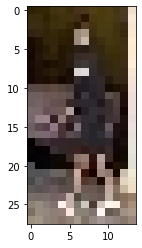

In [ ]:
# plt.imshow(cv2.cvtColor(cccc, cv2.COLOR_BGR2RGB))
# plt.show()

https://answers.opencv.org/question/42049/body-detection-using-haarcascade/ <br>
![image.png](attachment:image.png)<br>
detecting을 못함. -> 포기 ㅋ

## Deep Learning

In [6]:
# Data Reload
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
!unzip -qq "/content/drive/MyDrive/멋쟁이사자처럼_파이널프로젝트/images_new.zip" -d "/content/images"

In [8]:
!unzip -qq "/content/drive/MyDrive/멋쟁이사자처럼_파이널프로젝트/test_images.zip" -d "/content/test_images"

In [ ]:
# 필요없을듯
# from sklearn.model_selection import train_test_split

In [9]:
# Data dir 확인
train_ok_dir = os.path.join('images/point')
train_no_dir = os.path.join('images/no')
print(len(os.listdir(train_ok_dir))) 
print(len(os.listdir(train_no_dir))) 
# Data Augmentation and False Data 추가 확보 필요

2074
918


In [10]:
train_ok_names = os.listdir(train_ok_dir)
train_no_names = os.listdir(train_no_dir)

In [11]:
import matplotlib.image as mpimg

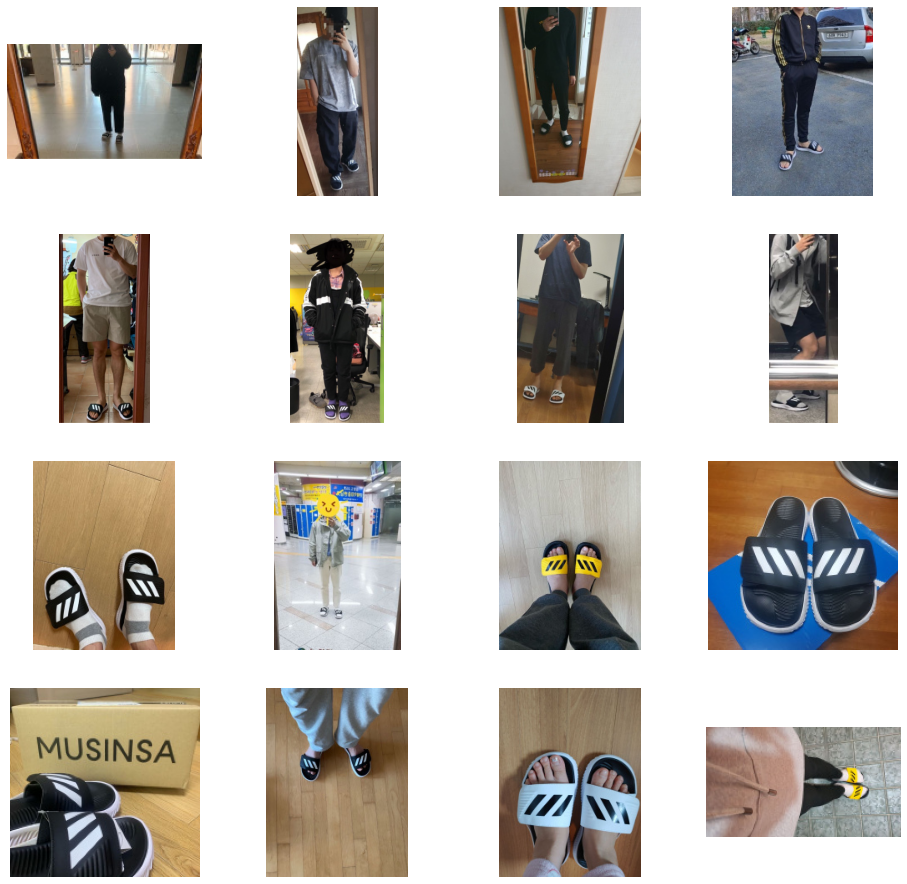

In [12]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_ok_pix = [os.path.join(train_ok_dir, fname) 
                for fname in train_ok_names[pic_index-8:pic_index]]
next_no_pix = [os.path.join(train_no_dir, fname) 
                for fname in train_no_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_ok_pix+next_no_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [13]:
# Data 불러오기
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# 255개의 pixel을 나눠서 min-max standardization한다고 보면됨
# float32여야지 CNN이 동작해서 1./255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range = 20,
                                   width_shift_range = 0.1, 
                                   height_shift_range = 0.1,
                                   brightness_range = [.2, .2],
                                   horizontal_flip = True,
                                   #validation_split = .1
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')
 
# 'train_datagen' 이라는 generator를 이용해서 모든 데이터를 긁어옴 
train_generator = train_datagen.flow_from_directory(
        'images', # images folder에 있는 all images 불러오기
        target_size=(300, 300),  # all images 사이즈 300X300변경
        classes=['no', 'point'], # colab환경에서 돌리면 폴더수+1개의 class로 분류함
        batch_size=128, # epoch당 들어가는 image 파일수
        class_mode='binary')     # 적립금 지급 or 댓글 대상으로 이진분류를 할것이기 때문에 binary선택.

Found 2992 images belonging to 2 classes.


In [15]:
# test Data 불러오기
test_datagen = ImageDataGenerator(rescale = 1./255,)
test_generator = test_datagen.flow_from_directory(
        'test_images', # test_images folder에서 사진가져오기. directory임 잊지말것.
        target_size=(300, 300),
        classes=['no', 'point'],
        batch_size=128,
        class_mode='binary')

Found 1113 images belonging to 2 classes.


In [14]:
# 전이학습, RESNET 사용할꺼면 이 코드로 모델링

# from tensorflow.keras.applications.resnet50 import ResNet50

# conv_base = ResNet50(weights='imagenet',
#                      include_top=False,
#                      input_shape=(300, 300, 3))
# conv_base.summary()



# model = tf.keras.models.Sequential()

# model.add(conv_base)
# model.add(layers.Flatten())

# # 우리가 직접 만드는 모델을 하단에
# model.add(layers.Dense(128, activation=None))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(64, activation=None))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
# drop out 안하는 이유 https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # pooling size를 2by2로해서, output은 300x300넣으면 150x150으로 반쪽이됨.
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [18]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss = tf.keras.losses.binary_crossentropy, # colab에서는 tf.keras.losses.BinaryCrossentropy
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])# colab에서는 tf.keras.metrics.Accuracy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

In [21]:
reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
early_stop = EarlyStopping(patience=10,verbose=2,monitor='loss')


model_save_folder_path= './model/'
if not os.path.exists(model_save_folder_path): #없으면 model 폴더 생성
  os.mkdir(model_save_folder_path)

model_path = model_save_folder_path + 'model_{epoch:03d}-{loss:.4f}.hdf5' #hdf5파일로 저장

model_ckpt = ModelCheckpoint(filepath=model_path, # file은 
                             monitor='loss', # loss를 기준으로 checkpoint를 만들겠다.
                                verbose=1, 
                             save_best_only=True # best model만 save. 다만 여기선 파일명이 계속 달라서, all model 저장함.
                             )  

https://snowdeer.github.io/machine-learning/2018/01/09/find-best-model/

In [23]:
history = model.fit(
      train_generator,
      batch_size=16,
      epochs=20, # 전체데이터의 학습을 20회 반복 (forward pass/backward pass 왕복이 1epoch)
      verbose=1,
      validation_data = test_generator, #validation data로 test data를 넣음. 1) 그래프그리려고, 2) test accuracy보려고
      callbacks=[model_ckpt,reduce_lr,early_stop]
      )

Epoch 1/20
24/24 [==============================] - 68s 3s/step - loss: 0.5945 - acc: 0.6852 - val_loss: 0.4196 - val_acc: 0.9093

Epoch 00001: loss improved from 0.74938 to 0.59445, saving model to ./model/model_001-0.5945.hdf5
Epoch 2/20
24/24 [==============================] - 67s 3s/step - loss: 0.5316 - acc: 0.7430 - val_loss: 0.3960 - val_acc: 0.8580

Epoch 00002: loss improved from 0.59445 to 0.53161, saving model to ./model/model_002-0.5316.hdf5
Epoch 3/20
24/24 [==============================] - 70s 3s/step - loss: 0.4694 - acc: 0.7931 - val_loss: 1.4725 - val_acc: 0.6181

Epoch 00003: loss improved from 0.53161 to 0.46941, saving model to ./model/model_003-0.4694.hdf5
Epoch 4/20
24/24 [==============================] - 68s 3s/step - loss: 0.4481 - acc: 0.7985 - val_loss: 2.6011 - val_acc: 0.3711

Epoch 00004: loss improved from 0.46941 to 0.44811, saving model to ./model/model_004-0.4481.hdf5
Epoch 5/20
24/24 [==============================] - 68s 3s/step - loss: 0.4109 - acc

In [27]:
model_choiced = keras.models.load_model("./model/model_008-0.3536.hdf5")

In [28]:
print(history.history)

{'loss': [0.5944511294364929, 0.5316105484962463, 0.4694071114063263, 0.4481135606765747, 0.410906583070755, 0.40262115001678467, 0.35976654291152954, 0.35364916920661926, 0.3339076042175293, 0.33680132031440735, 0.26714658737182617, 0.25797194242477417, 0.26287394762039185, 0.2540304362773895, 0.24785935878753662, 0.24099278450012207, 0.24394038319587708, 0.24417917430400848, 0.2407286912202835, 0.2234092354774475], 'acc': [0.6851603984832764, 0.7429812550544739, 0.793114960193634, 0.7984625697135925, 0.8145053386688232, 0.8255347609519958, 0.8482620120048523, 0.8492646813392639, 0.8539438247680664, 0.8579545617103577, 0.8957219123840332, 0.8993983864784241, 0.894385039806366, 0.8963903784751892, 0.8997326493263245, 0.904411792755127, 0.8977272510528564, 0.8967245817184448, 0.9010695219039917, 0.9114304780960083], 'val_loss': [0.419558584690094, 0.3959842026233673, 1.4725215435028076, 2.601140260696411, 1.2633848190307617, 3.784379720687866, 1.8290578126907349, 0.6396468877792358, 2.0

In [29]:
# 현재 모델 확인(test 데이터로부터 점검)
test_loss, test_acc = model_choiced.evaluate(test_generator)

9/9 [==============================] - 3s 321ms/step - loss: 0.6396 - acc: 0.8922


In [ ]:
print(history.history)

{'loss': [0.1434495747089386, 0.14577965438365936, 0.09610825031995773, 0.09118005633354187, 0.07393525540828705, 0.04346392676234245, 0.0643167793750763, 0.028384076431393623], 'acc': [0.947526752948761, 0.9428476095199585, 0.9652406573295593, 0.9675801992416382, 0.9749331474304199, 0.9849599003791809, 0.9729278087615967, 0.9919785857200623], 'val_loss': [0.449185311794281, 0.35563763976097107, 0.5182759165763855, 0.44839924573898315, 0.4549209475517273, 0.5587894916534424, 0.44077616930007935, 0.41229531168937683], 'val_acc': [0.8328840732574463, 0.8652291297912598, 0.8274932503700256, 0.8364779949188232, 0.8849955201148987, 0.8634321689605713, 0.8876909017562866, 0.9119496941566467]}


<Figure size 432x288 with 0 Axes>

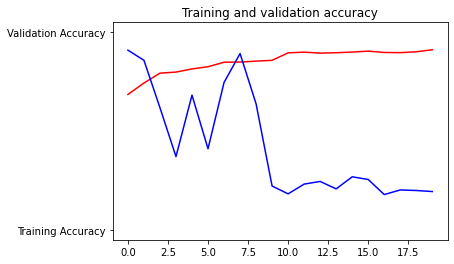

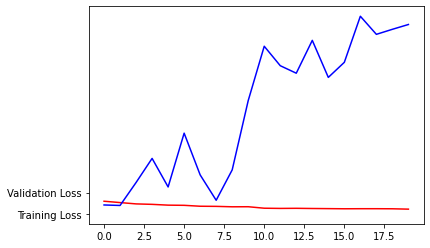

<Figure size 432x288 with 0 Axes>

In [30]:
%matplotlib inline


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc)) # Get number of epochs
 

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [31]:
# Load Model

loss_of_test, acc_of_test =model_choiced.evaluate(test_generator)
print('loss of test: {}, Accuracy : {}'.format(loss_of_test,acc_of_test))

9/9 [==============================] - 3s 328ms/step - loss: 0.6396 - acc: 0.8922
loss of test: 0.6396468281745911, Accuracy : 0.8921833038330078


HPO (with. Kerastuner)

In [32]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 4.4 MB/s 


In [33]:
from keras import initializers
import kerastuner as kt

import IPython

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2)])

In [59]:
model.add(tf.keras.layers.Flatten())


In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 355216)            0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [66]:
def build_hyper_model(hp):
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2)])

    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):

        hp_units = hp.Int('units_' + str(i), min_value=32, max_value=512, step=32) # 퍼셉트론수를 32~512개로 정하고, 32를 단위로 조정함
        hp_activations = hp.Choice('activation_' + str(i), values=['relu', 'elu']) #activation function은 relu, elu중에 하나
        model.add(tf.keras.layers.Conv2D(hp_units,(3,3), activation = hp_activations))
        model.add(tf.keras.layers.MaxPooling2D(2,2))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # learning rate choice
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.MeanSquaredError(),
                metrics = ['acc'])
    
    return model

In [72]:
tuner = kt.BayesianOptimization(build_hyper_model,
                                objective = 'val_acc', # test data 정확도 높은걸 찾겠다.
                                max_trials = 10,
                                directory = 'test_images',
                                project_name = 'Musinsa')

INFO:tensorflow:Reloading Oracle from existing project test_images/Musinsa/oracle.json


In [ ]:
# best 3 model
tuner.search(train_generator, epochs=20, validation_data = test_generator)
tuner.results_summary(num_trials=3)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
num_layers        |2                 |?                 
units_0           |256               |?                 
activation_0      |relu              |?                 
learning_rate     |0.001             |?                 

Epoch 1/20
24/24 [==============================] - 72s 3s/step - loss: 0.2088 - acc: 0.6765 - val_loss: 0.3663 - val_acc: 0.5265
Epoch 2/20
24/24 [==============================] - 71s 3s/step - loss: 0.1633 - acc: 0.7674 - val_loss: 0.1285 - val_acc: 0.8455
Epoch 3/20
24/24 [==============================] - 71s 3s/step - loss: 0.1323 - acc: 0.8189 - val_loss: 0.2110 - val_acc: 0.7457
Epoch 4/20
24/24 [==============================] - 71s 3s/step - loss: 0.1197 - acc: 0.8399 - val_loss: 0.2104 - val_acc: 0.7556
Epoch 5/20
24/24 [==============================] - 71s 3s/step - loss: 0.1171 - acc: 0.8422 - val_loss: 0.1914 - val_acc: 0.7853
Epoch 6/20
24/24 [===================

In [ ]:
top3_models = tuner.get_best_hyperparameters(num_trials=3)

In [ ]:
best_hps = top3_models[0]

In [ ]:
print("""
The hyperparameter search is complete. 
* Optimal # of layers : {}
* Optimal value of the learning-rate : {}""".format(best_hps.get('num_layers'), best_hps.get('learning_rate')))

for layer_num in range(best_hps.get('num_layers')):
    print('Layer {} - # of Perceptrons :'.format(layer_num), best_hps.get('units_' + str(layer_num)))
    print('Layer {} - Applied activation function :'.format(layer_num), best_hps.get('activation_' + str(layer_num)))

In [ ]:
models = tuner.get_best_models(num_models=3)
top_model = models[0]
top_model.summary()
print()

results = top_model.evaluate(test_generator)
print('Cross-entropy :', results[0])
print('Accuracy :', results[1])

In [ ]:
for trial in tuner.oracle.get_best_trials(num_trials=3):
    print('Trial-score is :', trial.score)
    print('Trial-directory(trial_id) is :', trial.trial_id)
    print()

In [ ]:
# model saving
models[0].save("model/top_model.h5")

In [ ]:
# 재검증
keras.models.load_model("model/top_model.h5").evaluate(test_generator)